# Churn prediction

In [553]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import warnings
plt.style.use('fivethirtyeight')
import matplotlib.gridspec as gridspec
warnings.filterwarnings('ignore')

## Check data

In [389]:
path='C:/Users/a.czepierga/Desktop/Machine Learning AI/Churn/'

In [390]:
train = pd.read_csv(path+"churnTrain.csv")
display(train.head(5))

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,...,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [391]:
test = pd.read_csv(path+"churnTest.csv")
display(test.head(10))

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
0,HI,101.0,510.0,3548815,no,no,0,70.9,123.0,12.05,211.9,73.0,18.01,236.0,73.0,10.62,10.6,3.0,2.86,3
1,MT,137.0,510.0,3817211,no,no,0,223.6,86.0,38.01,244.8,139.0,20.81,94.2,81.0,4.24,9.5,7.0,2.57,0
2,OH,103.0,408.0,4119481,no,yes,29,294.7,95.0,50.10,237.3,105.0,20.17,300.3,127.0,13.51,13.7,6.0,3.70,1
3,NM,99.0,415.0,4189100,no,no,0,216.8,123.0,36.86,126.4,88.0,10.74,220.6,82.0,9.93,15.7,2.0,4.24,1
4,SC,108.0,415.0,4133643,no,no,0,197.4,78.0,33.56,124.0,101.0,10.54,204.5,107.0,9.20,7.7,4.0,2.08,2
5,IA,117.0,415.0,3756180,no,no,0,226.5,85.0,38.51,141.6,68.0,12.04,223.0,90.0,10.04,6.9,5.0,1.86,1
6,ND,63.0,415.0,3488073,no,yes,32,218.9,124.0,37.21,214.3,125.0,18.22,260.3,120.0,11.71,12.9,3.0,3.48,1
7,LA,94.0,408.0,3599881,no,NaN,0,157.5,97.0,26.78,224.5,112.0,19.08,310.8,106.0,13.99,11.1,6.0,3.00,0
8,MO,138.0,510.0,3536954,no,no,0,89.1,117.0,15.15,126.8,46.0,10.78,190.5,71.0,8.57,9.9,4.0,2.67,2
9,TX,128.0,415.0,4034933,no,yes,43,177.8,100.0,30.23,147.3,89.0,12.52,194.2,92.0,8.74,11.9,1.0,3.21,0


In [392]:
train.shape

(3333, 21)

In [393]:
train_y=train['Churn']

In [581]:
#How many churns? ~17%

In [580]:
train['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [394]:
test.shape

(425, 20)

In [565]:
columns=train.columns[:21]
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)

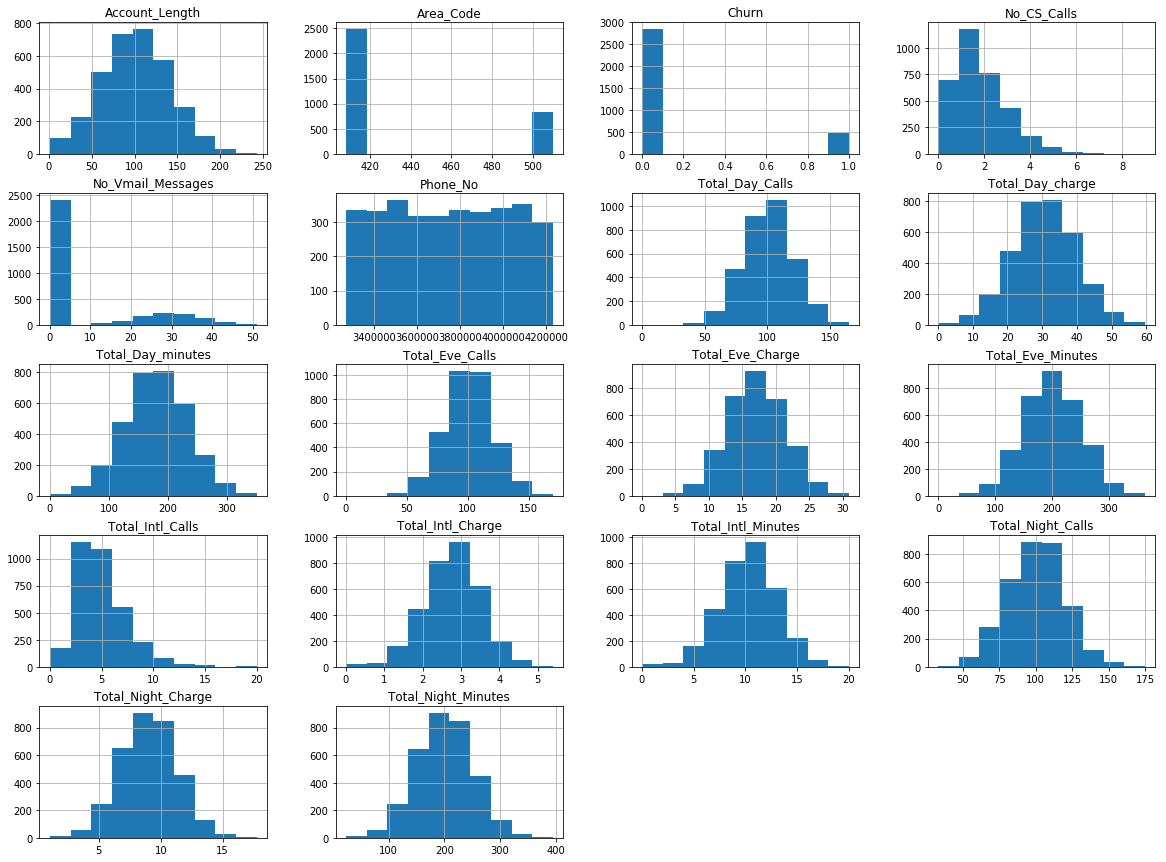

In [536]:
num_bins = 10
train.hist(bins=num_bins, figsize=(20,15))
plt.savefig("train_histogram_plots")
plt.show()

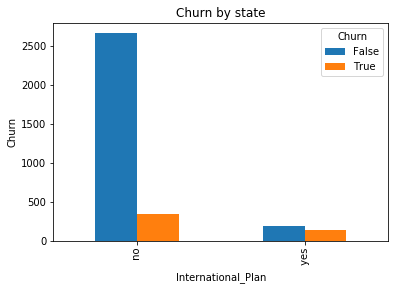

In [539]:

pd.crosstab(train.International_Plan,train.Churn).plot(kind='bar')
plt.title('Churn by state')
plt.xlabel('International_Plan')
plt.ylabel('Churn')
plt.savefig('state_bar_chart')

In [ ]:

pd.crosstab(train.State,train.Churn).plot(kind='bar')
plt.title('Churn by international plan')
plt.xlabel('International plan')
plt.ylabel('Churn')
plt.savefig('plan_bar_chart')

## Clean missing data

In [395]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Churn,0,0.0
Total_Day_charge,0,0.0
Account_Length,0,0.0
Area_Code,0,0.0
Phone_No,0,0.0
International_Plan,0,0.0
Voice_Mail_Plan,0,0.0
No_Vmail_Messages,0,0.0
Total_Day_minutes,0,0.0
Total_Day_Calls,0,0.0


In [396]:
#missing test data
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Total_Day_charge,11,0.025882
Total_Night_Minutes,11,0.025882
Total_Eve_Minutes,11,0.025882
Total_Day_minutes,7,0.016471
Total_Night_Calls,6,0.014118
Total_Intl_Calls,5,0.011765
Total_Eve_Charge,5,0.011765
International_Plan,5,0.011765
Total_Night_Charge,4,0.009412
Total_Eve_Calls,4,0.009412


In [397]:
test.loc[:, "Total_Day_charge"] = test.loc[:, "Total_Day_charge"].fillna(0)
test.loc[:, "Total_Night_Minutes"] = test.loc[:, "Total_Night_Minutes"].fillna(0)
test.loc[:, "Total_Eve_Minutes"] = test.loc[:, "Total_Eve_Minutes"].fillna(0)
test.loc[:, "Total_Day_minutes"] = test.loc[:, "Total_Day_minutes"].fillna(0)
test.loc[:, "Total_Night_Calls"] = test.loc[:, "Total_Night_Calls"].fillna(0)
test.loc[:, "Total_Intl_Calls"] = test.loc[:, "Total_Intl_Calls"].fillna(0)

test.loc[:, "Total_Eve_Charge"] = test.loc[:, "Total_Eve_Charge"].fillna(0)
test.loc[:, "Total_Night_Charge"] = test.loc[:, "Total_Night_Charge"].fillna(0)
test.loc[:, "Total_Eve_Calls"] = test.loc[:, "Total_Eve_Calls"].fillna(0)
test.loc[:, "Total_Day_Calls"] = test.loc[:, "Total_Day_Calls"].fillna(0)
test.loc[:, "Total_Intl_Minutes"] = test.loc[:, "Total_Intl_Minutes"].fillna(0)
test.loc[:, "Total_Intl_Calls"] = test.loc[:, "Total_Intl_Calls"].fillna(0)

In [398]:
test.loc[:, "International_Plan"] = test.loc[:, "International_Plan"].fillna('no')
test.loc[:, "Voice_Mail_Plan"] = test.loc[:, "Voice_Mail_Plan"].fillna('no')

In [399]:
test['Account_Length'] = test['Account_Length'].fillna((test['Account_Length'].mean()))

In [400]:
test.dropna(subset=['Area_Code'])

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
0,HI,101.0,510.0,3548815,no,no,0,70.9,123.0,12.05,211.9,73.0,18.01,236.0,73.0,10.62,10.6,3.0,2.86,3
1,MT,137.0,510.0,3817211,no,no,0,223.6,86.0,38.01,244.8,139.0,20.81,94.2,81.0,4.24,9.5,7.0,2.57,0
2,OH,103.0,408.0,4119481,no,yes,29,294.7,95.0,50.10,237.3,105.0,20.17,300.3,127.0,13.51,13.7,6.0,3.70,1
3,NM,99.0,415.0,4189100,no,no,0,216.8,123.0,36.86,126.4,88.0,10.74,220.6,82.0,9.93,15.7,2.0,4.24,1
4,SC,108.0,415.0,4133643,no,no,0,197.4,78.0,33.56,124.0,101.0,10.54,204.5,107.0,9.20,7.7,4.0,2.08,2
5,IA,117.0,415.0,3756180,no,no,0,226.5,85.0,38.51,141.6,68.0,12.04,223.0,90.0,10.04,6.9,5.0,1.86,1
6,ND,63.0,415.0,3488073,no,yes,32,218.9,124.0,37.21,214.3,125.0,18.22,260.3,120.0,11.71,12.9,3.0,3.48,1
7,LA,94.0,408.0,3599881,no,no,0,157.5,97.0,26.78,224.5,112.0,19.08,310.8,106.0,13.99,11.1,6.0,3.00,0
8,MO,138.0,510.0,3536954,no,no,0,89.1,117.0,15.15,126.8,46.0,10.78,190.5,71.0,8.57,9.9,4.0,2.67,2
9,TX,128.0,415.0,4034933,no,yes,43,177.8,100.0,30.23,147.3,89.0,12.52,194.2,92.0,8.74,11.9,1.0,3.21,0


## Check correlation

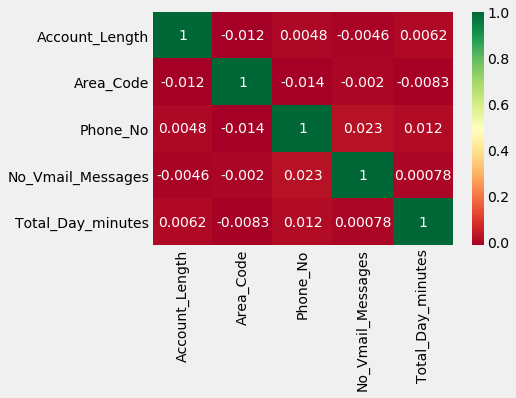

In [571]:
sns.heatmap(train[train.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

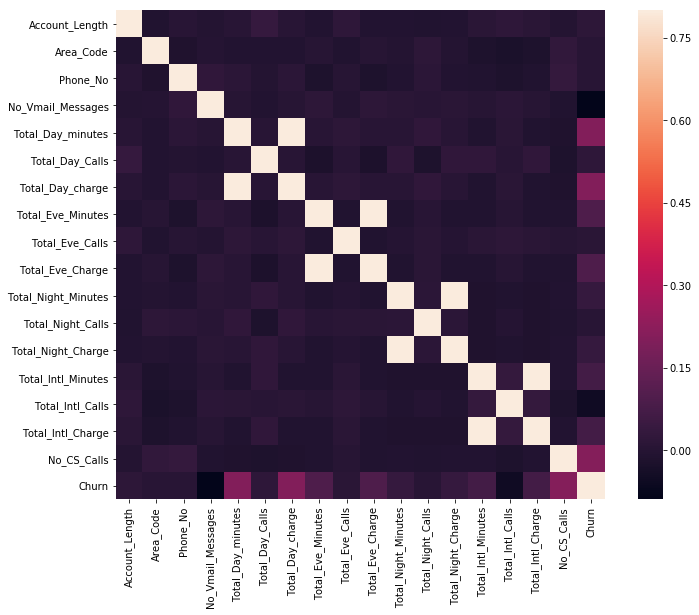

In [401]:
corrmat1 = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat1, vmax=.8, square=True);

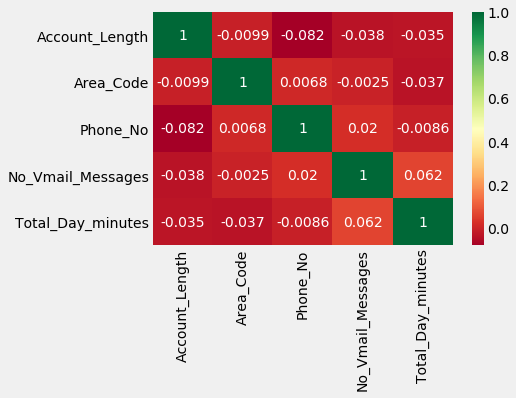

In [575]:
sns.heatmap(test[test.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

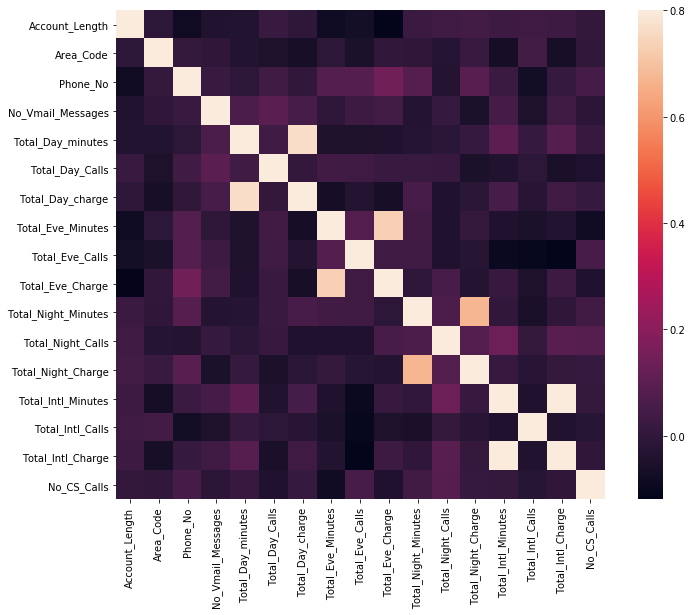

In [402]:
corrmat2 = test.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2, vmax=.8, square=True);

## Prepare data for modelling

In [403]:
df=pd.concat([train, test])

In [404]:
df.shape

(3758, 21)

In [405]:
df.head()

,Account_Length,Area_Code,Churn,International_Plan,No_CS_Calls,No_Vmail_Messages,Phone_No,State,Total_Day_Calls,Total_Day_charge,...,Total_Eve_Calls,Total_Eve_Charge,Total_Eve_Minutes,Total_Intl_Calls,Total_Intl_Charge,Total_Intl_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Night_Minutes,Voice_Mail_Plan
0,128.0,415.0,False,no,1,25,3824657,KS,110.0,45.07,...,99.0,16.78,197.4,3.0,2.70,10.0,91.0,11.01,244.7,yes
1,107.0,415.0,False,no,1,26,3717191,OH,123.0,27.47,...,103.0,16.62,195.5,3.0,3.70,13.7,103.0,11.45,254.4,yes
2,137.0,415.0,False,no,0,0,3581921,NJ,114.0,41.38,...,110.0,10.30,121.2,5.0,3.29,12.2,104.0,7.32,162.6,no
3,84.0,408.0,False,yes,2,0,3759999,OH,71.0,50.90,...,88.0,5.26,61.9,7.0,1.78,6.6,89.0,8.86,196.9,no
4,75.0,415.0,False,yes,3,0,3306626,OK,113.0,28.34,...,122.0,12.61,148.3,3.0,2.73,10.1,121.0,8.41,186.9,no


In [ ]:
#check types

In [406]:
df.dtypes

Account_Length         float64
Area_Code              float64
Churn                   object
International_Plan      object
No_CS_Calls              int64
No_Vmail_Messages        int64
Phone_No                 int64
State                   object
Total_Day_Calls        float64
Total_Day_charge       float64
Total_Day_minutes      float64
Total_Eve_Calls        float64
Total_Eve_Charge       float64
Total_Eve_Minutes      float64
Total_Intl_Calls       float64
Total_Intl_Charge      float64
Total_Intl_Minutes     float64
Total_Night_Calls      float64
Total_Night_Charge     float64
Total_Night_Minutes    float64
Voice_Mail_Plan         object
dtype: object

In [ ]:
#drop unuseful columns and get features for models

In [407]:

df = df.drop(["Phone_No", "Area_Code", "State","Churn"], axis=1)


In [408]:
features =  df.columns

In [409]:
features

Index(['Account_Length', 'International_Plan', 'No_CS_Calls',
       'No_Vmail_Messages', 'Total_Day_Calls', 'Total_Day_charge',
       'Total_Day_minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Eve_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'Total_Intl_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Night_Minutes', 'Voice_Mail_Plan'],
      dtype='object')

In [410]:
df.head()

,Account_Length,International_Plan,No_CS_Calls,No_Vmail_Messages,Total_Day_Calls,Total_Day_charge,Total_Day_minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Eve_Minutes,Total_Intl_Calls,Total_Intl_Charge,Total_Intl_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Night_Minutes,Voice_Mail_Plan
0,128.0,no,1,25,110.0,45.07,265.1,99.0,16.78,197.4,3.0,2.70,10.0,91.0,11.01,244.7,yes
1,107.0,no,1,26,123.0,27.47,161.6,103.0,16.62,195.5,3.0,3.70,13.7,103.0,11.45,254.4,yes
2,137.0,no,0,0,114.0,41.38,243.4,110.0,10.30,121.2,5.0,3.29,12.2,104.0,7.32,162.6,no
3,84.0,yes,2,0,71.0,50.90,299.4,88.0,5.26,61.9,7.0,1.78,6.6,89.0,8.86,196.9,no
4,75.0,yes,3,0,113.0,28.34,166.7,122.0,12.61,148.3,3.0,2.73,10.1,121.0,8.41,186.9,no


In [504]:
#Encoding categorical values

In [411]:
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [412]:
dummyEncode(df)

,Account_Length,International_Plan,No_CS_Calls,No_Vmail_Messages,Total_Day_Calls,Total_Day_charge,Total_Day_minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Eve_Minutes,Total_Intl_Calls,Total_Intl_Charge,Total_Intl_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Night_Minutes,Voice_Mail_Plan
0,128.0,0,1,25,110.0,45.07,265.1,99.0,16.78,197.4,3.0,2.70,10.0,91.0,11.01,244.7,1
1,107.0,0,1,26,123.0,27.47,161.6,103.0,16.62,195.5,3.0,3.70,13.7,103.0,11.45,254.4,1
2,137.0,0,0,0,114.0,41.38,243.4,110.0,10.30,121.2,5.0,3.29,12.2,104.0,7.32,162.6,0
3,84.0,1,2,0,71.0,50.90,299.4,88.0,5.26,61.9,7.0,1.78,6.6,89.0,8.86,196.9,0
4,75.0,1,3,0,113.0,28.34,166.7,122.0,12.61,148.3,3.0,2.73,10.1,121.0,8.41,186.9,0
5,118.0,1,0,0,98.0,37.98,223.4,101.0,18.75,220.6,6.0,1.70,6.3,118.0,9.18,203.9,0
6,121.0,0,3,24,88.0,37.09,218.2,108.0,29.62,348.5,7.0,2.03,7.5,118.0,9.57,212.6,1
7,147.0,1,0,0,79.0,26.69,157.0,94.0,8.76,103.1,6.0,1.92,7.1,96.0,9.53,211.8,0
8,117.0,0,1,0,97.0,31.37,184.5,80.0,29.89,351.6,4.0,2.35,8.7,90.0,9.71,215.8,0
9,141.0,1,0,37,84.0,43.96,258.6,111.0,18.87,222.0,5.0,3.02,11.2,97.0,14.69,326.4,1


In [579]:
#Other way
#df['International_Plan'].replace(['No','Yes'],[0,1],inplace=True)

In [413]:
df.shape

(3758, 17)

In [414]:
y.shape

(3758,)

In [415]:
train_y.shape

(3333,)

In [ ]:
#Get old shapes

In [416]:
train_x=df.iloc[:3333,:]


In [417]:
train_x.shape

(3333, 17)

In [418]:
test_x=df.iloc[-424:]


In [419]:
test_x.shape

(424, 17)

In [ ]:
#Split data

In [420]:
#df_train, df_test = train_test_split(df, test_size=0.25)

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.25, random_state=0)



In [421]:
X_train.shape

(2499, 17)

In [422]:
X_test.shape

(834, 17)

In [423]:
y_train.shape

(2499,)

In [424]:
y_test.shape

(834,)

In [ ]:
#Features centering and scaling? Delete??

In [577]:
features = df.columns.values

for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std

## Random forest 

In [425]:
clf = RandomForestClassifier(n_estimators=30)
clf.fit(X_train[features], y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [426]:
# Make predictions
predictions = clf.predict(X_test[features])
probs = clf.predict_proba(X_test[features])


In [427]:
score = clf.score(X_test[features], y_test)
print("Accuracy: ", score)

Accuracy:  0.9544364508393285


In [507]:
#Save submission

In [492]:
submission = pd.DataFrame(predictions, columns=['Churn'])

In [503]:
submission.to_csv(path + "submission1.csv", index=True)

In [506]:
#Confusion matrix

In [428]:
confusion_matrix = pd.DataFrame(
    confusion_matrix(y_test, predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

,Predicted False,Predicted True
Actual False,707,12
Actual True,26,89


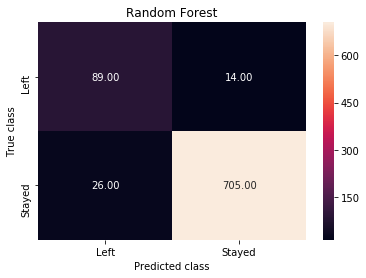

In [547]:
forest_cm = metrics.confusion_matrix(predictions, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [545]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

      False       0.96      0.98      0.97       719
       True       0.86      0.77      0.82       115

avg / total       0.95      0.95      0.95       834



In [ ]:
#ROC curve

In [533]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC ", roc_auc)

ROC AUC  0.8772207776501179


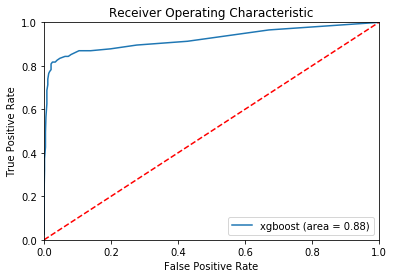

In [551]:
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='xgboost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [510]:
X_test["prob_true"] = probs[:, 1]
df_risky = X_test[X_test["prob_true"] > 0.9]
display(df_risky.head(10)[["prob_true"]])

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,prob_true
2708,1.000000
306,0.966667
1912,0.933333
2113,1.000000
1950,1.000000
3072,0.966667
2325,0.966667
2267,0.933333
1713,0.933333
1702,0.966667


In [ ]:
#Feature importance

,importance,labels
5,0.148459,Total_Day_charge
6,0.131908,Total_Day_minutes
2,0.128132,No_CS_Calls
1,0.081139,International_Plan
8,0.068735,Total_Eve_Charge


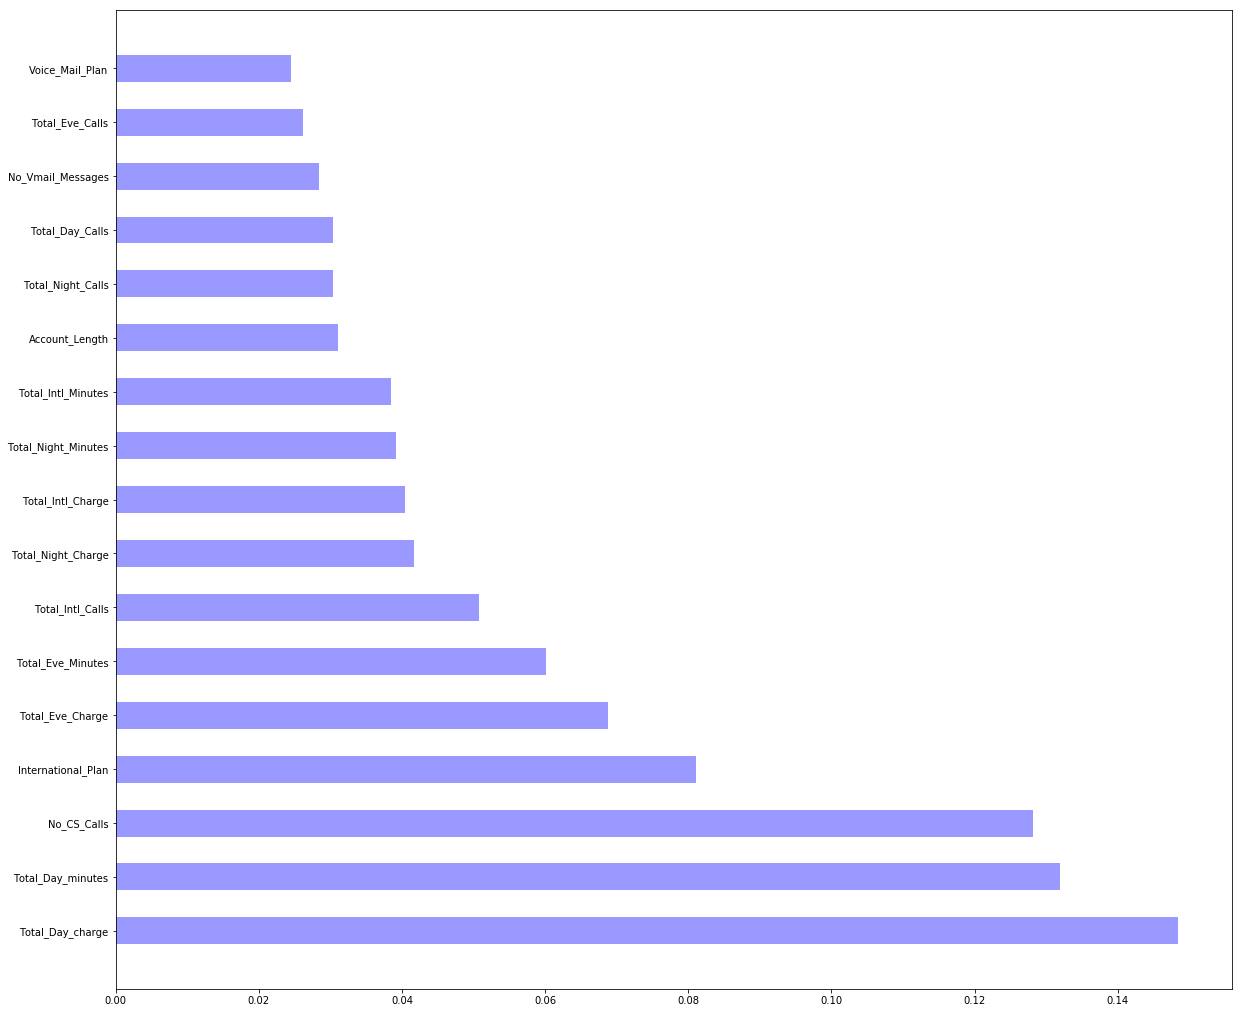

In [505]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

## Check xgboost

In [525]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train[features], y_train)
# Make predictions
predictions = model.predict(X_test[features])
y_pred = model.predict_proba(X_test[features])
# evaluate predictions
accuracy = model.score(X_test[features], y_test)
print("Accuracy: ", accuracy)




Accuracy:  0.9520383693045563


In [530]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC ", roc_auc)

ROC AUC  0.8772207776501179


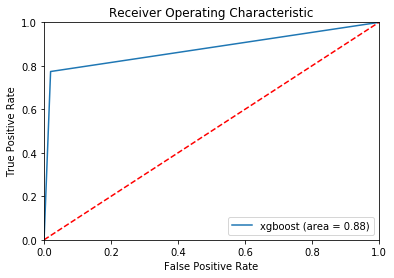

In [550]:
fpr, tpr, threshold = roc_curve(y_test, predictions)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='xgboost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Check other models

In [522]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), GaussianNB()]
for i in models:
    model = i
    model.fit(X_train[features], y_train)
    prediction=model.predict(X_test[features])
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
Decision Tree,0.922062
Logistic Regression,0.871703
Linear Svm,0.862110
Radial Svm,0.862110
Naive Bayes,0.862110
KNN,0.857314


In [548]:
abc

[0.8621103117505995,
 0.8621103117505995,
 0.8717026378896883,
 0.8573141486810552,
 0.9220623501199041,
 0.8621103117505995]

In [540]:
#Random forest still the best

## Cross validation

In [544]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train[features], y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.944


In [ ]:
#https://www.kaggle.com/mnpathak1/model-comparison-with-roc-curves-and-more
#https://dataskunkworks.com/2018/06/05/predicting-customer-churn-with-python-logistic-regression-decision-trees-and-random-forests/
#http://blog.keyrus.co.uk/a_simple_approach_to_predicting_customer_churn.html

In [ ]:
#How to handle imbalanced classes?

In [582]:
#Next: neutral networks

In [584]:
import  keras
from  keras import Sequential
from keras.layers import Dense

In [590]:
classifier=Sequential()


classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=17))
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train[features],y_train,batch_size=10,epochs=20)

Epoch 1/20
2499/2499 [==============================] - 1s 206us/step - loss: 0.5719 - acc: 0.8503
Epoch 2/20
2499/2499 [==============================] - 0s 84us/step - loss: 0.3523 - acc: 0.8527
Epoch 3/20
2499/2499 [==============================] - 0s 84us/step - loss: 0.3348 - acc: 0.8527
Epoch 4/20
2499/2499 [==============================] - 0s 92us/step - loss: 0.3308 - acc: 0.8527
Epoch 5/20
2499/2499 [==============================] - 0s 80us/step - loss: 0.3273 - acc: 0.8527
Epoch 6/20
2499/2499 [==============================] - 0s 80us/step - loss: 0.3252 - acc: 0.8527
Epoch 7/20
2499/2499 [==============================] - 0s 80us/step - loss: 0.3237 - acc: 0.8527
Epoch 8/20
2499/2499 [==============================] - 0s 85us/step - loss: 0.3222 - acc: 0.8527
Epoch 9/20
2499/2499 [==============================] - 0s 82us/step - loss: 0.3211 - acc: 0.8527
Epoch 10/20
2499/2499 [==============================] - 0s 86us/step - loss: 0.3206 - acc: 0.8527
Epoch 11/20
2499/2

In [587]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred > 0.5)

ValueError: Error when checking input: expected dense_4_input to have shape (17,) but got array with shape (18,)

In [591]:
cnn_cm=confusion_matrix(y_test,y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [592]:
cnn_cm

NameError: name 'cnn_cm' is not defined